# Congrego

In [15]:
# Import Libraries:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [6]:
import os
os.getcwd()

'C:\\Users\\sarah\\Documents\\python\\congrego\\notebooks'

In [7]:
# Read shapefile dbf as df:

vol2017 = gpd.read_file('../traffic_data/2017_Traffic_Volume-shp/2017_Traffic_Volume.dbf')
vol2017.head(2)

,OBJECTID,ROUTEID,FROMMEASUR,TOMEASURE,FROMDATE,TODATE,EVENTID,AADT,AADT_YEAR,LOCERROR,SHAPELEN,geometry
0,40,11000102,2710.132,2772.071,2017-01-01,1970-01-01,{4979DA7C-9DB1-4D47-B2FB-D80C0CC91D1B},6728,2017,NO ERROR,61.938996,"LINESTRING Z (-77.01216 38.91573 0.00000, -77...."
1,41,11000102,2772.071,2851.602,2017-01-01,1970-01-01,{02C04032-61AA-4ABD-B130-BA969F184C68},6728,2017,NO ERROR,79.531672,"LINESTRING Z (-77.01216 38.91629 0.00000, -77...."


In [9]:
# Import Center Lines Data:

centerlines = gpd.read_file('../traffic_data/Street_Centerlines-shp/Street_Centerlines.dbf')
centerlines.head(2)

,OBJECTID,ROADWAYSEG,STREETSEGI,STREETID,SOURCEID,ROADTYPE,STCODE,STTYPEID,QUADCODE,ST_NAME,...,TOLEFTTHEO,FROMRIGHTT,TORIGHTTHE,LIFECYCLES,INSERVICED,OUTOFSERVI,UPDATETIME,OBJECTID_1,SHAPELEN,geometry
0,6324291,15,14.0,104816.0,14816050,Street,04816,4.0,1,Indiana Ave,...,598.0,463.0,599.0,Active,2004-08-27,None,2004-12-14,0,98.204053,"LINESTRING (-77.01894 38.89481, -77.01901 38.8..."
1,6324292,1809,12108.0,100120.0,10120010,Street,00120,139.0,1,12th St,...,298.0,101.0,299.0,Active,2004-08-27,None,2004-12-14,0,134.541076,"LINESTRING (-77.02819 38.89047, -77.02819 38.8..."


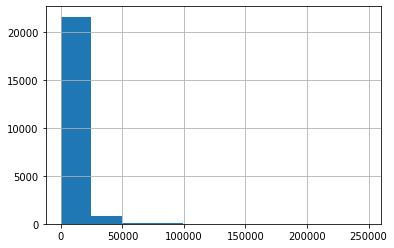

In [10]:
vol2017['AADT'].hist();

In [22]:
vol2017.AADT.describe()

count     22654.00000
mean       6370.25298
std       12080.86465
min          63.00000
25%        2000.00000
50%        2000.00000
75%        5758.00000
max      247307.00000
Name: AADT, dtype: float64

In [11]:
centerlines['FUNCTIONAL'].value_counts()

Local                           13800
Minor Arterial                   3164
Collector                        3085
Principal Arterial               1750
Interstate                         90
Other Freeway and Expressway       89
Name: FUNCTIONAL, dtype: int64

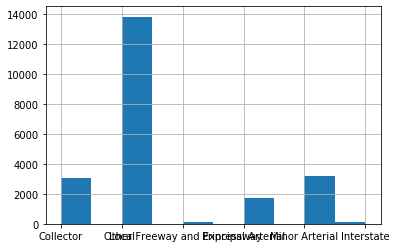

In [12]:
centerlines['FUNCTIONAL'].hist()

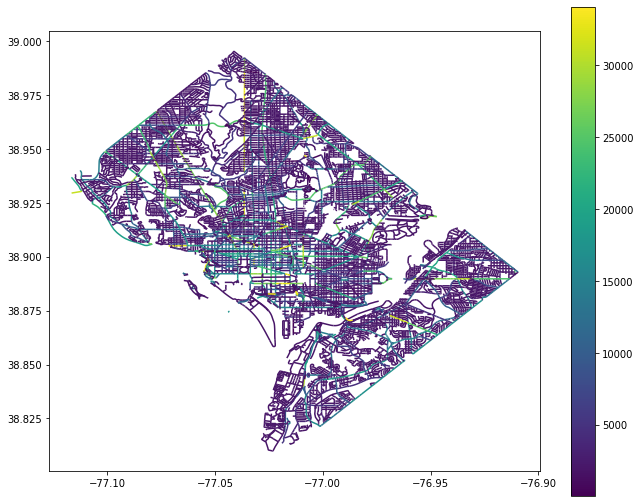

In [44]:
fig, ax = plt.subplots(figsize=(11,9))
vol2017.loc[vol2017.AADT<vol2017.AADT.quantile(0.98)].plot(ax=ax, column='AADT', legend=True)
#centerlines.plot(ax=ax)

In [30]:
ward_shp = gpd.read_file('../traffic_data/Ward_from_2012/Ward_from_2012.shp')


C:\Users\sarah\Anaconda3\envs\congregoenv\lib\site-packages\numpy\lib\function_base.py:2167: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


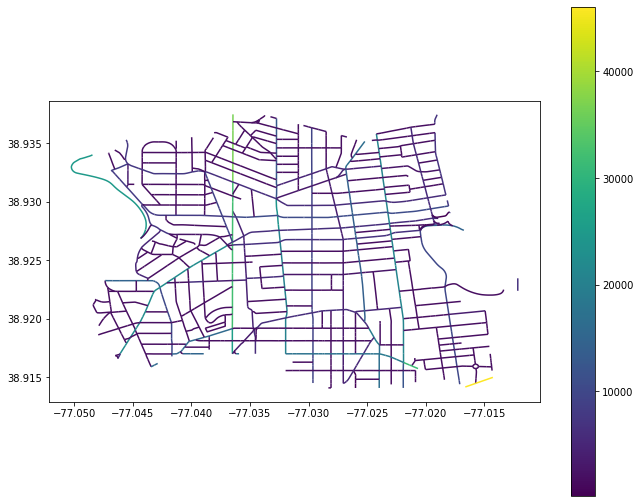

In [46]:
lines_ward1 = gpd.sjoin(vol2017, ward_shp.loc[ward_shp.WARD==1], op='within') 
lines_ward1.plot(figsize=(11,9),column='AADT', legend=True)

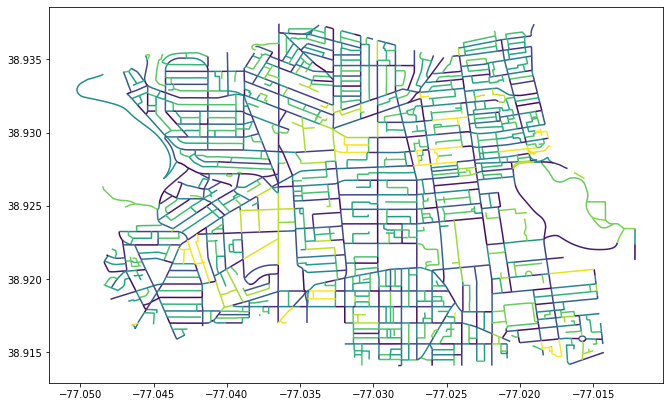

In [56]:
clines_ward1 = gpd.sjoin(centerlines, ward_shp.loc[ward_shp.WARD==1], op='within') 
clines_ward1.plot(figsize=(11,9), column='ROADWAYSEG')

In [55]:
clines_ward1.head()

,OBJECTID_left,ROADWAYSEG,STREETSEGI,STREETID,SOURCEID,ROADTYPE,STCODE,STTYPEID,QUADCODE,ST_NAME,...,PCT_BELO_9,PCT_BELO10,NO_DIPLOMA,DIPLOMA_25,NO_DEGREE_,ASSOC_DEGR,BACH_DEGRE,MED_VAL_OO,Shape_Le_1,Shape_Ar_1
30,6324497,12860,12595.0,101061.0,11061002,Street,01061,22.0,1,Anna J Cooper Cir,...,17.9,7.7,3224,6984,5293,1258,17613,542100,12925.384774,6.567941e+06
38,6324505,17837,10559.0,108008.0,18008290,Street,08008,4.0,1,Sherman Ave,...,17.9,7.7,3224,6984,5293,1258,17613,542100,12925.384774,6.567941e+06
39,6324506,24319,NaN,NaN,2184256303,Alley,None,NaN,1,None,...,17.9,7.7,3224,6984,5293,1258,17613,542100,12925.384774,6.567941e+06
68,6324537,11655,12470.0,100020.0,10020195,Street,00020,139.0,1,2nd St,...,17.9,7.7,3224,6984,5293,1258,17613,542100,12925.384774,6.567941e+06
72,6324541,4081,2619.0,103386.0,13386175,Street,03386,139.0,1,Euclid St,...,17.9,7.7,3224,6984,5293,1258,17613,542100,12925.384774,6.567941e+06
